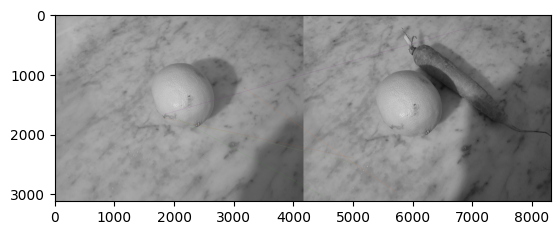

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob

# Load query image
img1 = cv2.imread('dataset/test/citron.jpg', 0)
kp1, des1 = cv2.ORB_create().detectAndCompute(img1, None)

# Load images from the dataset
path = glob.glob("dataset/trainin/*.jpg")


# Initialize ORB detector
orb = cv2.ORB_create()

# Create BFMatcher (use Hamming distance for ORB)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

best_matches_count = 0
best_matching_image = None

# Loop through all images in the specified path
for img_path in path:
    img2 = cv2.imread(img_path, 0)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Match descriptors using BFMatcher
    matches = bf.match(des1, des2)

    # Apply ratio test to filter good matches
    good_matches = []
    for m in matches:
        if m.distance < 0.75 * min(m.queryIdx, m.trainIdx):
            good_matches.append(m)

    # Display information about the matching
    #print(f"Good Matches count for {img_path}: {len(good_matches)}")

    # If the current image has more good matches than the previous best, update the best information
    if len(good_matches) > best_matches_count:
        best_matches_count = len(good_matches)
        best_matching_image = img2

# Display the best matching image
if best_matching_image is not None:
    img3 = cv2.drawMatches(img1, kp1, best_matching_image, kp2, good_matches[:5], None, flags=2)
    plt.imshow(img3), plt.show()
else:
    print("No matches found.")
